# Prosper Loan Data Analysis

### Dataset
The dataset contains 113,937 Loan Data from Prosper with 81 variables. 

### Key Question: 
Which features influence the borrower's annual percentage rate (APR) for the loan?

Here, I will conduct an exploration of the dataset to solve our key question. 

### Data gathering
I will first import necessary packages and libraries, and load the data into a pandas dataframe. 

In [1]:
# import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load dataset into a pandas datafram
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# display the first row of the dataset
loan.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [4]:
# show data info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# load variable definition
var_def = pd.read_csv('Prosper Loan Data - Variable Definitions - Sheet1.csv')
var_def

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.
...,...,...
76,PercentFunded,Percent the listing was funded.
77,Recommendations,Number of recommendations the borrower had at ...
78,InvestmentFromFriendsCount,Number of friends that made an investment in t...
79,InvestmentFromFriendsAmount,Dollar amount of investments that were made by...


### To begin with, I will have a look on the basic variables of the loan, such as term, status. 

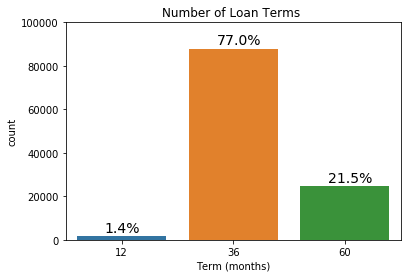

In [6]:
# show the stats of Loan terms. 
ax = sb.countplot(data=loan, x='Term')
plt.title('Number of Loan Terms ')
plt.xlabel('Term (months)')
total = len(loan['Term'])
plt.ylim(0,100000)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 -0.15
        y = p.get_y() + p.get_height()+2000
        ax.annotate(percentage, (x, y),fontsize=14)
        
plt.show()

#### Conclusion: 77% of the loans are of 2 years terms, 21.5% of loans are of 3 years term, and only 1.4% loans are of 1 year term. 

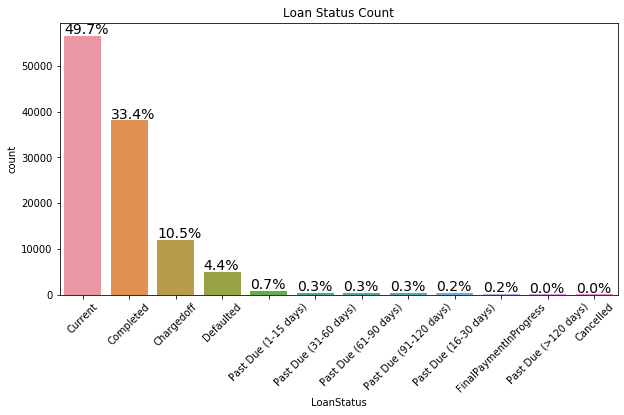

In [7]:
# The check current loan status. 
fig, ax = plt.subplots(figsize=(10,5))
sb.countplot(data = loan, x='LoanStatus',ax = ax, order = loan['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Loan Status Count')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 -0.4
        y = p.get_y() + p.get_height()+500
        ax.annotate(percentage, (x, y),fontsize=14)
plt.show()

#### Conclusion: For all the loans in the dataset, about 49.7% of the loans are currently running, 33.4% are completed, 10.5% are chargedoff, 4.4% are defaulted, and the rest 2% are past due. 

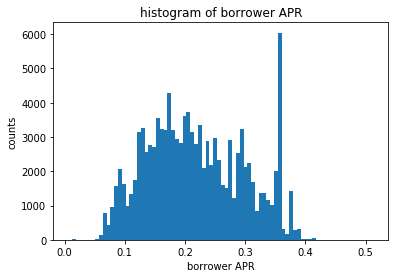

In [8]:
# The check the distribution of APR
plt.hist(loan['BorrowerAPR'],density=False,bins = 80)
plt.ylabel('counts')
plt.xlabel('borrower APR')
plt.title('histogram of borrower APR')
plt.show()

#### Conclusion: The distribution of APR shows that APR doesn't follow a normal distribution, but looks like a sum of multiple normal distributions. 

## Then explore how variables that doesn't relate to the borrow influences loan annual rate, such as 'LoanOriginationQuarter', ' LoanOriginalAmount', 'Borrowstate', and etc. 

In [10]:
# select variables for exploration
cols_idx = [7, 4, 17, 63, 65]

# generate dataframe 
df = loan[var_def['Variable'].iloc[cols_idx]]
df.head()

,BorrowerAPR,Term,BorrowerState,LoanOriginalAmount,LoanOriginationQuarter
0,0.16516,36,CO,9425,Q3 2007
1,0.12016,36,CO,10000,Q1 2014
2,0.28269,36,GA,3001,Q1 2007
3,0.12528,36,GA,10000,Q4 2012
4,0.24614,36,MN,15000,Q3 2013


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BorrowerAPR             113912 non-null  float64
 1   Term                    113937 non-null  int64  
 2   BorrowerState           108422 non-null  object 
 3   LoanOriginalAmount      113937 non-null  int64  
 4   LoanOriginationQuarter  113937 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.3+ MB


In [12]:
df.describe()

,BorrowerAPR,Term,LoanOriginalAmount
count,113912.000000,113937.000000,113937.00000
mean,0.218828,40.830248,8337.01385
std,0.080364,10.436212,6245.80058
min,0.006530,12.000000,1000.00000
25%,0.156290,36.000000,4000.00000
50%,0.209760,36.000000,6500.00000
75%,0.283810,36.000000,12000.00000
max,0.512290,60.000000,35000.00000


#### Make a plot to check how 'BorrowerAPR' correlates with selected variables.

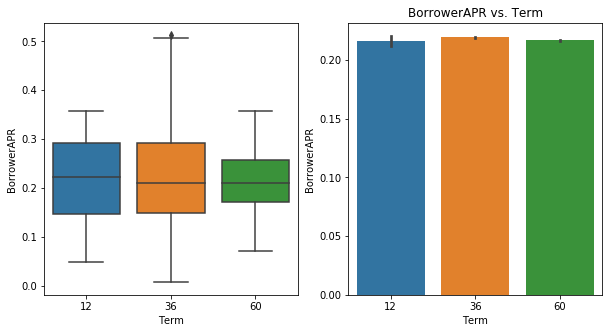

In [11]:
# boxplot for 'Term' and 'BorrowerAPR'
fig, ax = plt.subplots(1,2,figsize=(10,5))
sb.boxplot(data = df, x = 'Term', y = 'BorrowerAPR', ax=ax[0])
plt.title('BorrowerAPR vs. Term')
sb.barplot(data = df, x = 'Term', y = 'BorrowerAPR', ax=ax[1])
plt.title('BorrowerAPR vs. Term')
plt.show()

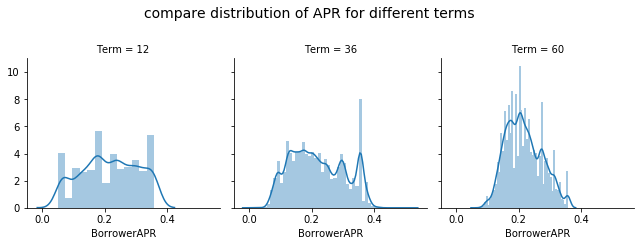

In [12]:
# check distribution difference for different Term
g = sb.FacetGrid(df, col="Term")
g.map(sb.distplot, "BorrowerAPR")
plt.text(-1,14,'compare distribution of APR for different terms',fontsize=14)
plt.show()

#### Conclusion: The APR for the loan with 60 months term shows different pattern of distribution, compared to loans of 12 or 36 months term. 

I then check how Loan original amount and APR related. 

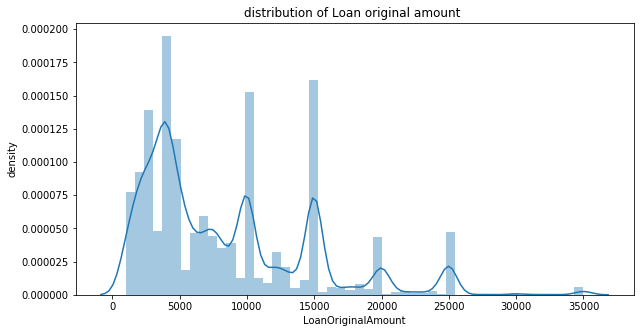

In [17]:
# histogram for Loan Original Amount
fig, ax = plt.subplots(figsize=(10,5))
sb.distplot(df['LoanOriginalAmount'], ax=ax)
plt.title('distribution of Loan original amount ')
plt.ylabel('density')
plt.show()

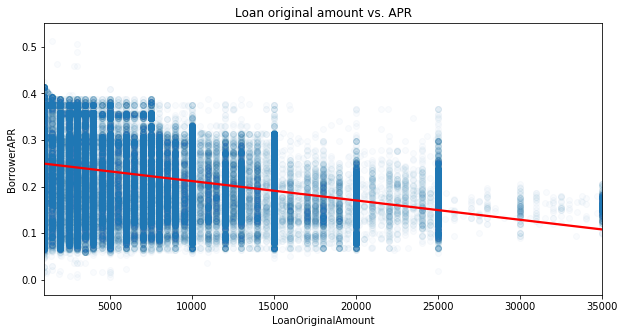

In [18]:
# scatter plot for 'LoanOriginalAmount' and 'BorrowerAPR'
fig, ax = plt.subplots(figsize=(10,5))
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', ax=ax, scatter_kws={'alpha':1/40},line_kws={"color": "red"})
plt.title('Loan original amount vs. APR')
plt.show()

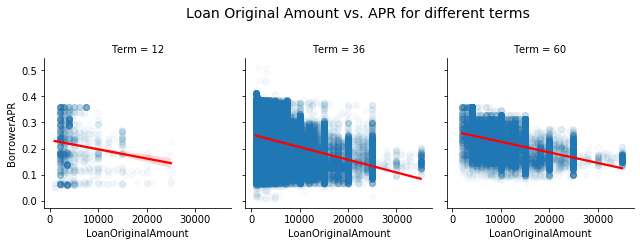

In [19]:
# FacetGrid to make scatter plot for 'LoanOriginalAmount' and 'BorrowerAPR'for different terms
g = sb.FacetGrid(df, col="Term")
g.map(sb.regplot, "LoanOriginalAmount", "BorrowerAPR",scatter_kws={'alpha':1/40},line_kws={"color": "red"})
plt.text(-55000,0.7,'Loan Original Amount vs. APR for different terms',fontsize=14)
plt.show()

#### Conclusion:  The higher the loan original amount the higher borrower APR is. We also found that the loan original amount seems lower for loan with 12 months term. 

we can confirm this by plot the histogram of loan original amount for different term.

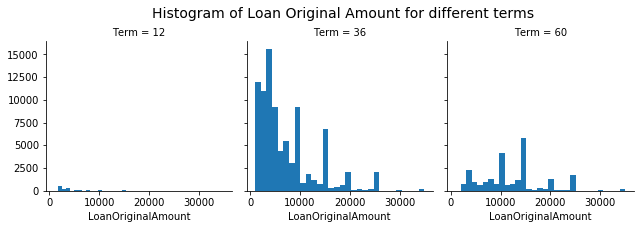

In [20]:
# FacetGrid to make histogram of 'LoanOriginalAmount' for different terms
g = sb.FacetGrid(df, col="Term")
g.map(plt.hist, "LoanOriginalAmount", bins =30)
plt.text(-60000,19000,'Histogram of Loan Original Amount for different terms',fontsize=14)
plt.show()

#### Conclusion: the loan original amount for loan with 12 months term are mostly less than 10000. And there are higher proportion of high amount loans (more than 10000) in loan with 60 months term. 

Next, we check whether the average APR is the same in different states.

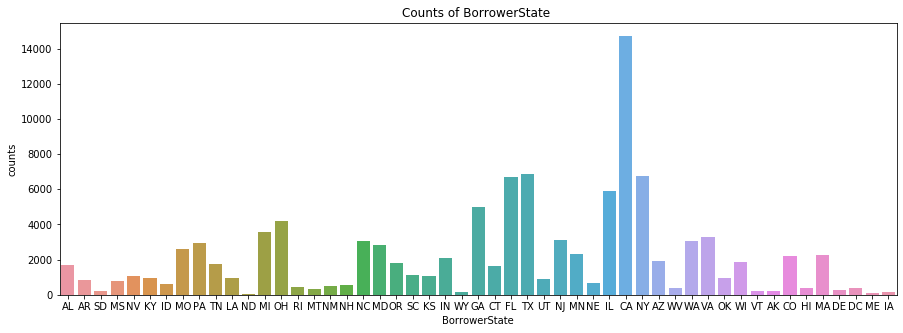

In [25]:
# countplot for 'borrowerState'
order_state = df.groupby('BorrowerState').mean().sort_values(by='BorrowerAPR', ascending=False).index

fig, ax = plt.subplots(figsize=(15,5))
sb.countplot(df['BorrowerState'], ax=ax,order = order_state)
plt.title('Counts of BorrowerState ')
plt.ylabel('counts')
plt.show()

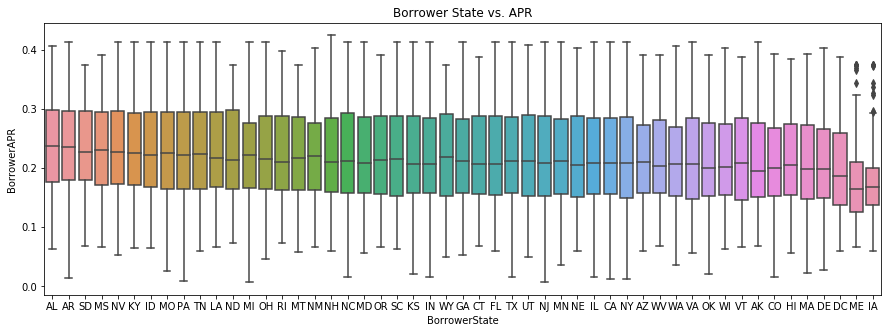

In [26]:
# boxplot for 'BorrowerState' and 'BorrowerAPR'
order_state = df.groupby('BorrowerState').mean().sort_values(by='BorrowerAPR', ascending=False).index
fig, ax = plt.subplots(figsize=(15,5))
sb.boxplot(data = df, x = 'BorrowerState', y = 'BorrowerAPR', ax=ax, order = order_state)
plt.title('Borrower State vs. APR')
plt.show()

#### Conclusion: Some states, i.e. AL and AR, have higher average APR than other states. The 3 states with the lowest APR are DC, ME and IA.

Next, we plot how APR changes with time. 

In [13]:
# convert LoanOriginationQuarter to an value, i.e 2007.1 stands for Q1 2007
Quarter = df['LoanOriginationQuarter'].str.rsplit(n=1, expand=True)
Quarter_val = Quarter[1].astype(int) + Quarter[0].str[-1].astype(int)*0.1

df['LOQuarter'] = Quarter_val
df.head()

,BorrowerAPR,Term,BorrowerState,LoanOriginalAmount,LoanOriginationQuarter,LOQuarter
0,0.16516,36,CO,9425,Q3 2007,2007.3
1,0.12016,36,CO,10000,Q1 2014,2014.1
2,0.28269,36,GA,3001,Q1 2007,2007.1
3,0.12528,36,GA,10000,Q4 2012,2012.4
4,0.24614,36,MN,15000,Q3 2013,2013.3


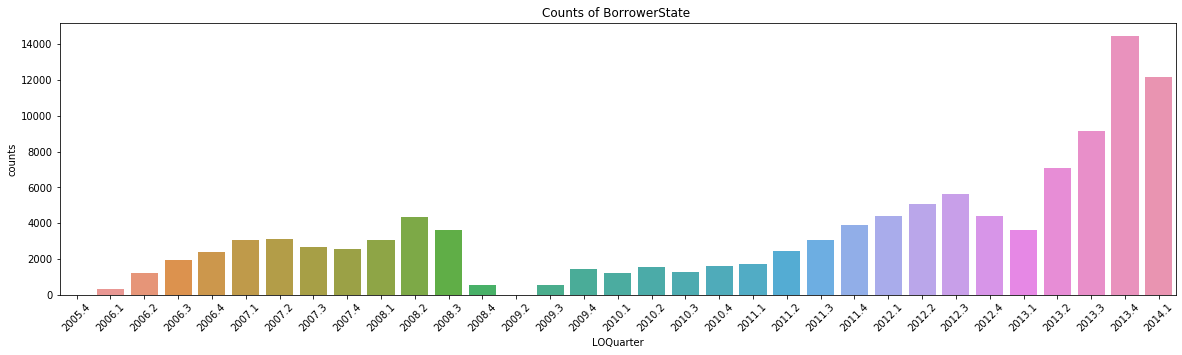

In [39]:
# countplot for time variables
ord=df['LOQuarter'].unique()

fig, ax = plt.subplots(figsize=(20,5))
sb.countplot(df['LOQuarter'], ax=ax,order=sorted(ord))
plt.title('Counts of BorrowerState ')
plt.xticks(rotation=45)
plt.ylabel('counts')
plt.show()


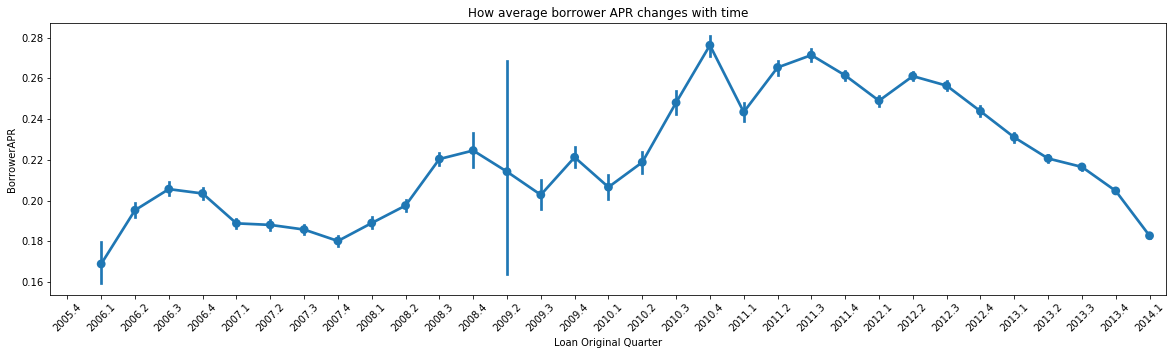

In [40]:
# make a point plot for BorrowerAPR as a function of Loan Original Quarter
fig, ax = plt.subplots(figsize=(20,5))
sb.pointplot(data=df, x='LOQuarter',y='BorrowerAPR')
plt.title('How average borrower APR changes with time')
plt.xticks(rotation=45)
plt.xlabel('Loan Original Quarter')
plt.show()

#### Conclusion: Here, we found that the borrower APR flactuated with time, but there is no fixed tend. The APR is not alway increase or decrease with time. and it also seems not so correlated with quarter, such that loan in quarter 1 does not alway lower than the other quarters. Therefore, although date of the loan correlates with the APR, it may not be a good feature to make prediction of the APR.

### so far, we checked how features doesn't relate to the borrower influences APR. We found that term, loan original amount and state might be candidate features to make APR prediction. 

## Next, we will explore how borrower features influence APR. 


In [41]:
# select variables for exploration
cols_idx = [7, 13, 15, 19, 21, 35, 47, 51]

# generate dataframe 
df2 = loan[var_def['Variable'].iloc[cols_idx]]
df2.head()

,BorrowerAPR,ProsperRating (numeric),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,IncomeRange,TotalProsperLoans
0,0.16516,NaN,NaN,Self-employed,True,2.0,"$25,000-49,999",NaN
1,0.12016,6.0,7.0,Employed,False,0.0,"$50,000-74,999",NaN
2,0.28269,NaN,NaN,Not available,False,1.0,Not displayed,NaN
3,0.12528,6.0,9.0,Employed,True,4.0,"$25,000-49,999",NaN
4,0.24614,3.0,4.0,Employed,True,0.0,"$100,000+",1.0


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BorrowerAPR              113912 non-null  float64
 1   ProsperRating (numeric)  84853 non-null   float64
 2   ProsperScore             84853 non-null   float64
 3   EmploymentStatus         111682 non-null  object 
 4   IsBorrowerHomeowner      113937 non-null  bool   
 5   CurrentDelinquencies     113240 non-null  float64
 6   IncomeRange              113937 non-null  object 
 7   TotalProsperLoans        22085 non-null   float64
dtypes: bool(1), float64(5), object(2)
memory usage: 6.2+ MB


Here, we notice that some data are missing. For example, many borrower doesn't have prosper rating/score. 

In [43]:
# drop rows has no APR value
df2=df2[~df2['BorrowerAPR'].isnull()]  
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BorrowerAPR              113912 non-null  float64
 1   ProsperRating (numeric)  84853 non-null   float64
 2   ProsperScore             84853 non-null   float64
 3   EmploymentStatus         111682 non-null  object 
 4   IsBorrowerHomeowner      113912 non-null  bool   
 5   CurrentDelinquencies     113240 non-null  float64
 6   IncomeRange              113912 non-null  object 
 7   TotalProsperLoans        22085 non-null   float64
dtypes: bool(1), float64(5), object(2)
memory usage: 7.1+ MB


In [20]:
df2.describe()

,BorrowerAPR,ProsperRating (numeric),ProsperScore,CurrentDelinquencies,TotalProsperLoans
count,113912.000000,84853.000000,84853.000000,113240.000000,22085.000000
mean,0.218828,4.072243,5.950067,0.592052,1.421100
std,0.080364,1.673227,2.376501,1.978707,0.764042
min,0.006530,1.000000,1.000000,0.000000,0.000000
25%,0.156290,3.000000,4.000000,0.000000,1.000000
50%,0.209760,4.000000,6.000000,0.000000,1.000000
75%,0.283810,5.000000,8.000000,0.000000,2.000000
max,0.512290,7.000000,11.000000,83.000000,8.000000


#### We first have a look on Prosper Rating and Prosper Score. 

Prosper Score: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  
Prosper rating is a similar parameter to evaluate a customer’s risk. 

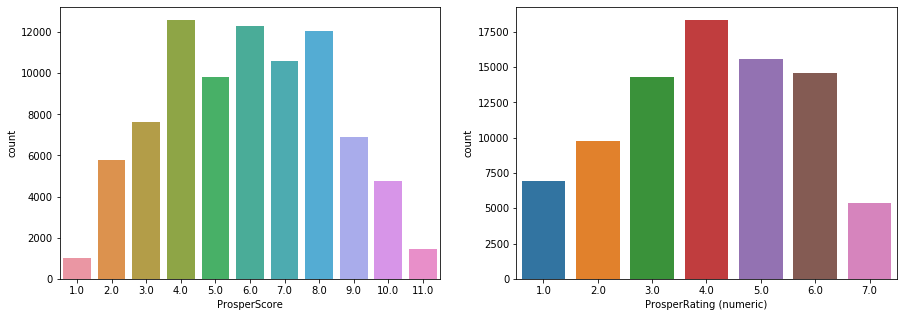

In [47]:
# check distribution of rating and score
df2u = df2[~df2['ProsperScore'].isnull()]  
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.countplot(df2u['ProsperScore'],ax=ax[0])
sb.countplot(df2u['ProsperRating (numeric)'],ax=ax[1])
plt.show()

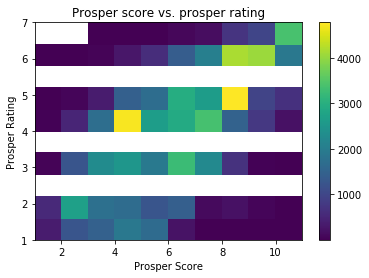

In [48]:
# make plot to see how those two relate to each other
plt.hist2d(df2u['ProsperScore'], df2u['ProsperRating (numeric)'],cmin=1)
plt.xlabel('Prosper Score')
plt.ylabel('Prosper Rating')
plt.title('Prosper score vs. prosper rating')
plt.colorbar()
plt.show()

#### Conclusion: for most of the scores, Prosper scores are positive correlated with Prosper rating. However, there are loans with high prosper score but low prosper rating. 

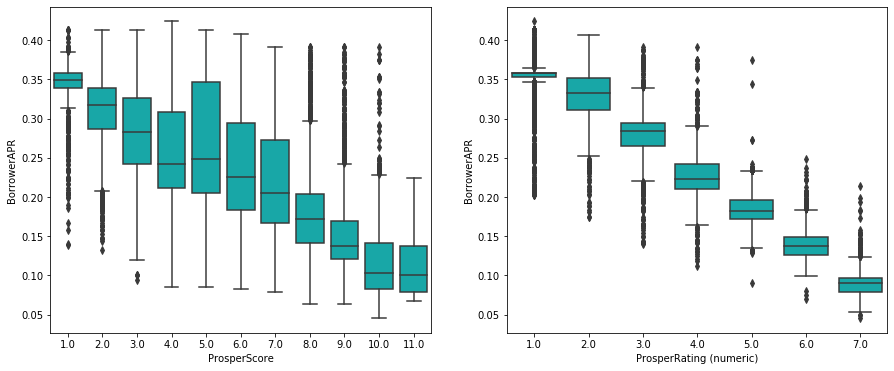

In [49]:
# bar plor to show how APR changes with Prosper score /Rating
fig, ax = plt.subplots(1,2,figsize=(15,6))
sb.boxplot(data=df2u,x='ProsperScore',y='BorrowerAPR',ax=ax[0],color='c')
sb.boxplot(data=df2u,x='ProsperRating (numeric)',y='BorrowerAPR',ax=ax[1],color='c')
plt.show()

#### Conclusion: there is strong negative correlation between APR and Prosper Score/Rating. 

Next, we checked whether 'EmploymentStatus' and 'IsBorrowerHomeowner' are correlated with APR. 

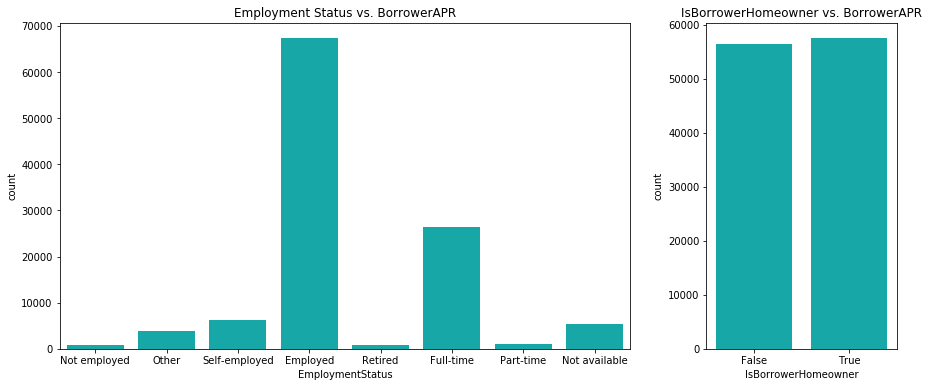

In [51]:
# chech distribution/counts for  'EmploymentStatus' or 'IsBorrowerHomeowner'

fig, ax = plt.subplots(1,2,figsize=(15,6),gridspec_kw={'width_ratios': [3, 1]})
order_SE = df2.groupby('EmploymentStatus').mean().sort_values(by='BorrowerAPR', ascending=False).index
sb.countplot(df2['EmploymentStatus'],ax=ax[0],color='c',order=order_SE)
ax[0].set_title('Employment Status vs. BorrowerAPR')
sb.countplot(df2['IsBorrowerHomeowner'],ax=ax[1],color='c')
ax[1].set_title('IsBorrowerHomeowner vs. BorrowerAPR')
plt.show() 

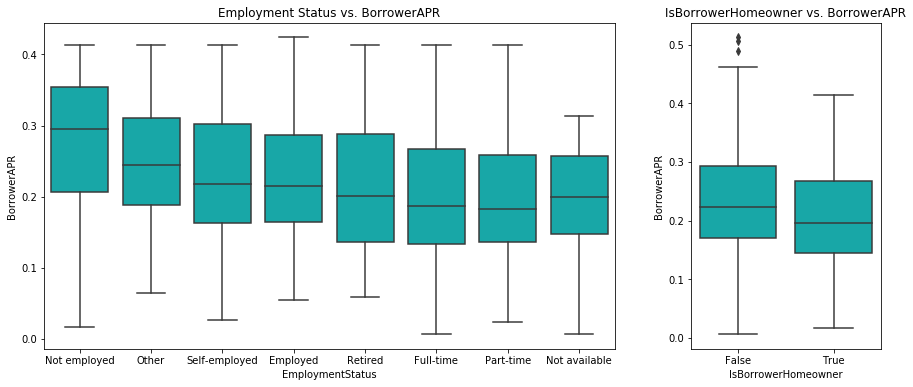

In [52]:
# bar plot to show how APR changes with 'EmploymentStatus' or 'IsBorrowerHomeowner'
fig, ax = plt.subplots(1,2,figsize=(15,6),gridspec_kw={'width_ratios': [3, 1]})
order_SE = df2.groupby('EmploymentStatus').mean().sort_values(by='BorrowerAPR', ascending=False).index
sb.boxplot(data=df2,x='EmploymentStatus',y='BorrowerAPR',ax=ax[0],color='c',order=order_SE)
ax[0].set_title('Employment Status vs. BorrowerAPR')
sb.boxplot(data=df2,x='IsBorrowerHomeowner',y='BorrowerAPR',ax=ax[1],color='c')
ax[1].set_title('IsBorrowerHomeowner vs. BorrowerAPR')
plt.show() 

#### Not-employed borrowers have relative higher APR than employed borrower. and borrowers that own home have relative lower APR than those don't own home. 

We then checked how those two variable influence APR together. 

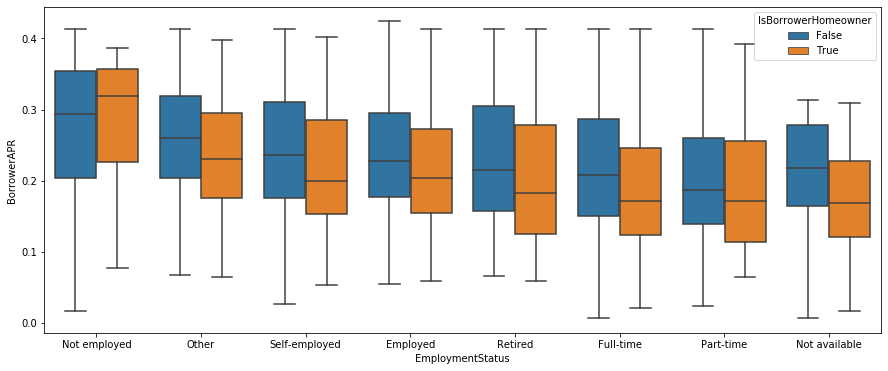

In [53]:
# box plot 
fig, ax = plt.subplots(figsize=(15,6))
sb.boxplot(data=df2,x='EmploymentStatus',y='BorrowerAPR',hue='IsBorrowerHomeowner',order=order_SE)
plt.show()


#### Conclusion: except for  not employed borrower, borrower owning home have lower APR than borrowers not owning home. 

It is worth noting that both 'employment status' and 'IsBorrowerHomeowner' might be correlated with Prosper rating/score. 
We will check this in the following part. Since Prosper Rating is positive correlated with Prosper score, here we only plot Prosper Rating. 

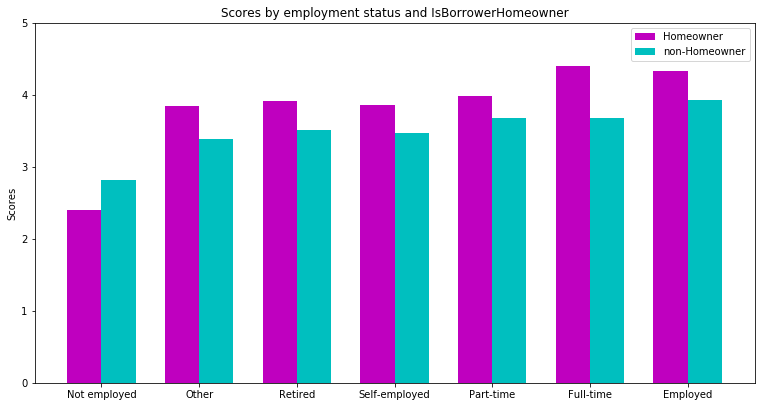

In [54]:
# plot Prosper rating by 'employment status' and 'IsBorrowerHomeowner'
rating_mean = df2u.groupby(['IsBorrowerHomeowner','EmploymentStatus']).mean()['ProsperRating (numeric)']
Homeowner_Means = rating_mean[1][[2,3,5,6,4,1,0]]
nonHomeowner_Means=rating_mean[0][[2,3,5,6,4,1,0]]

ind = np.arange(len(rating_mean[0])) # the x locations for the groups
width = 0.35
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, Homeowner_Means, width, color='m')
ax.bar(ind+width, nonHomeowner_Means, width,color='c')
ax.set_ylabel('Scores')
ax.set_title('Scores by employment status and IsBorrowerHomeowner')

labels = ['Not employed', 'Other', 'Retired', 'Self-employed', 'Part-time',
       'Full-time', 'Employed']
ax.set_xticks(ind+width/2)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 6, 1))
ax.legend(labels=['Homeowner', 'non-Homeowner'],loc='upper right')
plt.show()

#### Conclusion: As we expected, not employed borrowers are rated with lower score than employed borrowers. For homeowner condition, except for not employed borrowers that have higher score for non-homeowner, borrowers owning home are rated with higher score. 

Next, we chech how 'CurrentDelinquencies' influences APR. 	

In [55]:
df2u = df2[~df2['CurrentDelinquencies'].isnull()]
df2u.describe()

,BorrowerAPR,ProsperRating (numeric),ProsperScore,CurrentDelinquencies,TotalProsperLoans
count,113240.000000,84853.000000,84853.000000,113240.000000,22085.000000
mean,0.219025,4.072243,5.950067,0.592052,1.421100
std,0.080300,1.673227,2.376501,1.978707,0.764042
min,0.006530,1.000000,1.000000,0.000000,0.000000
25%,0.156290,3.000000,4.000000,0.000000,1.000000
50%,0.209840,4.000000,6.000000,0.000000,1.000000
75%,0.283860,5.000000,8.000000,0.000000,2.000000
max,0.423950,7.000000,11.000000,83.000000,8.000000


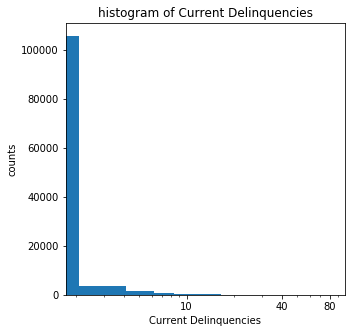

In [62]:
# make histogram for 'CurrentDelinquencies'
import matplotlib

fig,ax=plt.subplots(figsize=(5,5))
plt.hist(df2u['CurrentDelinquencies'],bins= 40)
plt.title('histogram of Current Delinquencies')
plt.xlabel('Current Delinquencies')
plt.ylabel('counts')
ax.set_xscale('log')
ax.set_xticks([10, 40, 80])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()

#### We found that majority of the borrowers have less than 2 current delinquencies. 

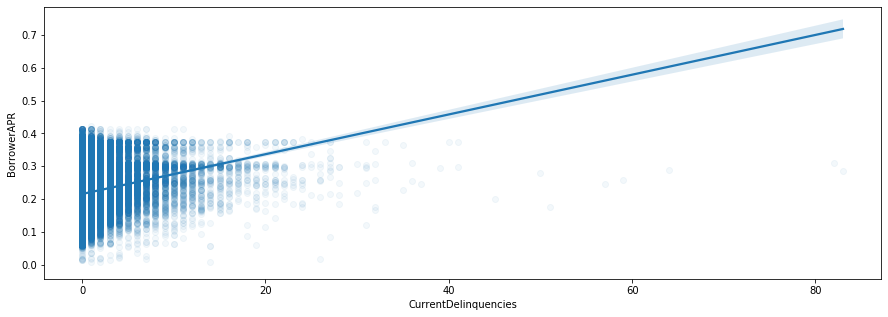

In [63]:
# make scatter plot for CurrentDelinquencies and borrowerAPR
fig,ax=plt.subplots(figsize=(15,5))
sb.regplot(data=df2u,x='CurrentDelinquencies',y='BorrowerAPR',scatter_kws={'alpha':1/20},ax=ax)
plt.show()

#### Conclusion : according to the plot, the CurrentDelinquencies are positive correlated with borrower APR. 

Next, we check how IncomeRange influence APR.

In [64]:
df2.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

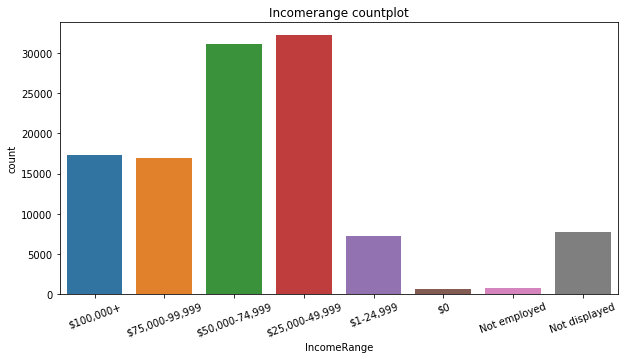

In [65]:
# count plot for incomrange
IncomeRange = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
        '$1-24,999',  '$0', 'Not employed', 'Not displayed']
fig,ax=plt.subplots(figsize=(10,5))
sb.countplot(data=df2,x='IncomeRange',order=IncomeRange)
plt.xticks(rotation=20)
plt.title('Incomerange countplot')
plt.show()

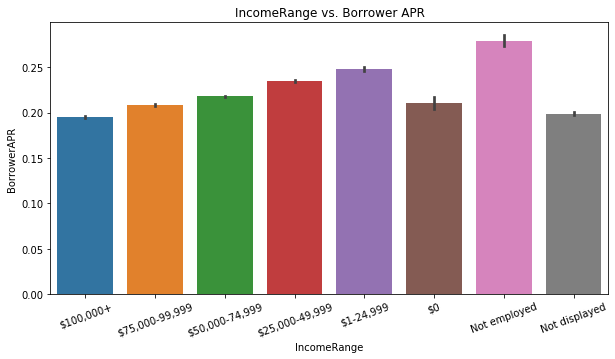

In [66]:
# bar plot for Incomerange vs. APR
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(data=df2,x='IncomeRange',y='BorrowerAPR',order=IncomeRange)
plt.xticks(rotation=20)
plt.title('IncomeRange vs. Borrower APR')
plt.show()

#### Conclusion: we found that the income of the borrower are negatively correlated with APR. not employed borrowers have relatively higher APR than the others. 

Finally, we checked how 'TotalProsperLoans' influences APR. 

In [67]:
# replace NaN with 0.
df2['TotalProsperLoans'].replace({np.nan:0},inplace=True)
df2['TotalProsperLoans']

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
113932    0.0
113933    3.0
113934    0.0
113935    1.0
113936    0.0
Name: TotalProsperLoans, Length: 113912, dtype: float64

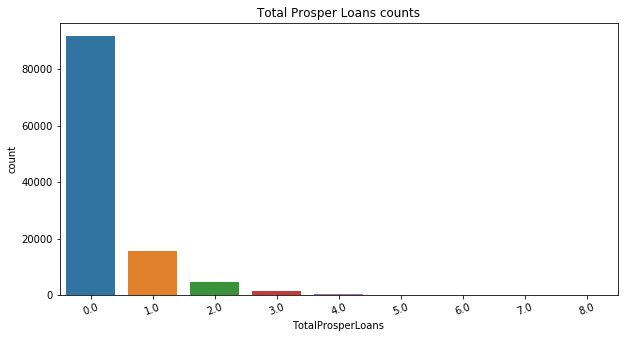

In [69]:
# count plot for total prosper loans
fig,ax=plt.subplots(figsize=(10,5))
sb.countplot(df2['TotalProsperLoans'])
plt.xticks(rotation=20)
plt.title('Total Prosper Loans counts')
plt.show()

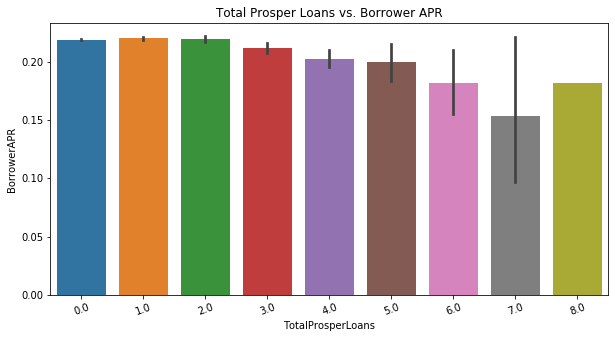

In [184]:
# bar plot for TotalProsperLoans vs. APR
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(data=df2,x='TotalProsperLoans',y='BorrowerAPR')
plt.xticks(rotation=20)
plt.title('Total Prosper Loans vs. Borrower APR')
plt.show()

#### Conclusion: the figure shows that the more Prosper loans the borrower have, the lower APR they will have. 



## To sum up:

Among our selected variables, we explored how borrower and borrower-non-related bariables influence APR. 

We found that  among borrower-non-related variables,term, loan original amount and state might be good features to make APR prediction.

For borrower related variables, we found that borrower rating/score, employment status, whether a homeowner, current delinquencies, income range and total Prosper loans are correlated with borrower APR. Although some variables are correlated with each other, such Prosper rating and employment status. 


